In [1]:
import numpy as np
import pandas as pd

In [2]:
carData = pd.read_csv('car_dataset.csv')

# Explore The Data

In [3]:
# We have data but have some unwanted rows we will figure that out later 
# First lets explore the Data

carData.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
carData.shape

(8128, 13)

In [5]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Explore Categorical Features

In [6]:
# Lets check out some continuous features (in short the features that are numbers)

carCont = carData.copy()

for i in carCont.columns:
    if carCont[i].dtype == "object":
        carCont.drop(i, axis=1, inplace=True)

carCont.head()

,year,selling_price,km_driven,seats
0,2014,450000,145500,5.0
1,2014,370000,120000,5.0
2,2006,158000,140000,5.0
3,2010,225000,127000,5.0
4,2007,130000,120000,5.0


In [7]:
carCont.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
# for corr() go to page no 62
carCont.corr()

,year,selling_price,km_driven,seats
year,1.000000,0.414092,-0.418006,-0.009144
selling_price,0.414092,1.000000,-0.225534,0.041358
km_driven,-0.418006,-0.225534,1.000000,0.227336
seats,-0.009144,0.041358,0.227336,1.000000


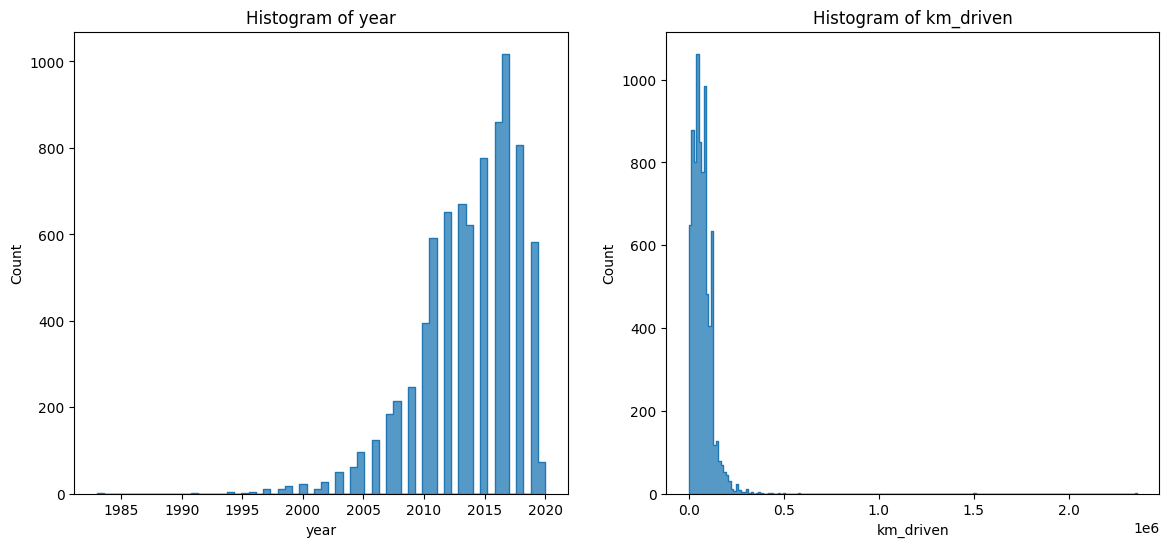

In [11]:
# Plot histograms for continuous features
import matplotlib.pyplot as plt
import seaborn as sns
col = 1
plt.figure(figsize=(14, 6))
for i in ["year",  "km_driven"]:
    plt.subplot(1, 2, col)
    sns.histplot(
        x = carCont[i],
        element="step",
    )
    plt.title(f"Histogram of {i}")
    col += 1

array([[<Axes: xlabel='year', ylabel='year'>,
        <Axes: xlabel='selling_price', ylabel='year'>,
        <Axes: xlabel='km_driven', ylabel='year'>,
        <Axes: xlabel='seats', ylabel='year'>],
       [<Axes: xlabel='year', ylabel='selling_price'>,
        <Axes: xlabel='selling_price', ylabel='selling_price'>,
        <Axes: xlabel='km_driven', ylabel='selling_price'>,
        <Axes: xlabel='seats', ylabel='selling_price'>],
       [<Axes: xlabel='year', ylabel='km_driven'>,
        <Axes: xlabel='selling_price', ylabel='km_driven'>,
        <Axes: xlabel='km_driven', ylabel='km_driven'>,
        <Axes: xlabel='seats', ylabel='km_driven'>],
       [<Axes: xlabel='year', ylabel='seats'>,
        <Axes: xlabel='selling_price', ylabel='seats'>,
        <Axes: xlabel='km_driven', ylabel='seats'>,
        <Axes: xlabel='seats', ylabel='seats'>]], dtype=object)

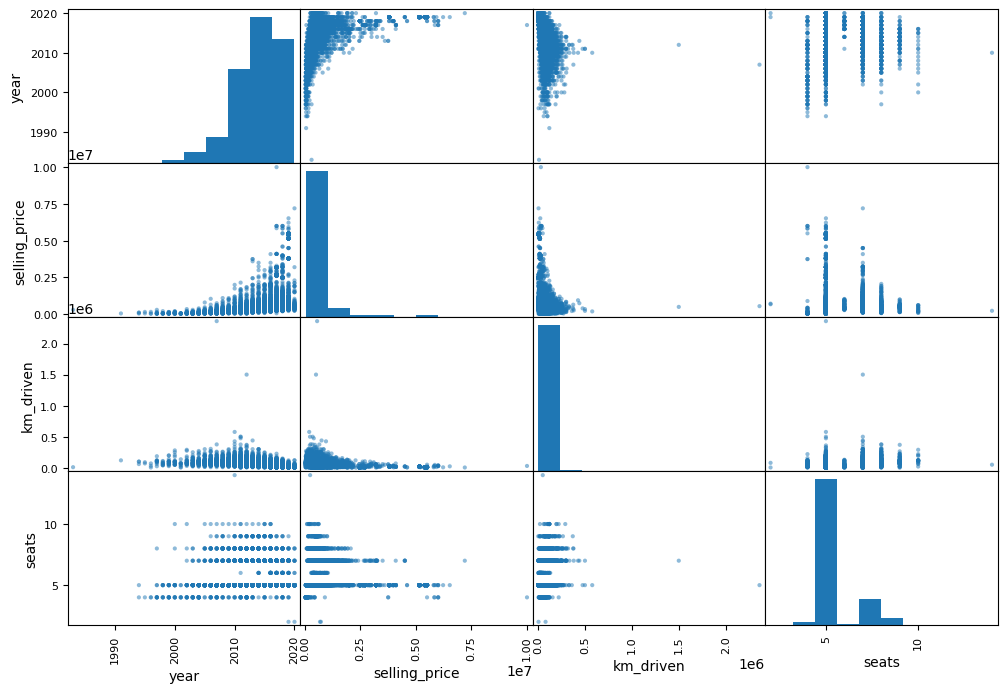

In [12]:
from pandas.plotting import scatter_matrix
attr = ["year", "selling_price", "km_driven", "seats"]
scatter_matrix(carCont[attr], figsize=(12, 8))

<Axes: xlabel='year', ylabel='selling_price'>

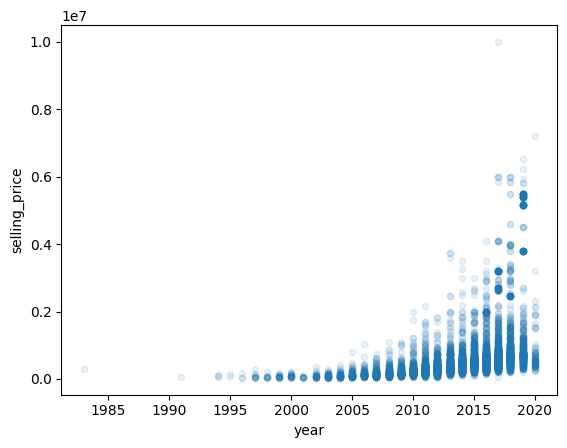

In [13]:
carCont.plot(kind="scatter", x="year", y="selling_price", alpha=0.1)

In [14]:
# Notice how prices increase as year increases

Explore Categorical Features

In [15]:
carCat = carData.copy()

for i in carCat.columns:
    if carCat[i].dtype != "object":
        carCat.drop(i, axis=1, inplace=True)

carCat.head()

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)"
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"


In [16]:
carCat.describe()

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,8128,8128,8128,8128,8128,7907,7907,7913,7906
unique,2058,4,3,2,5,393,121,322,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,129,4402,6766,7078,5289,225,1017,377,530


In [17]:
carCat['name']

0             Maruti Swift Dzire VDI
1       Skoda Rapid 1.5 TDI Ambition
2           Honda City 2017-2020 EXi
3          Hyundai i20 Sportz Diesel
4             Maruti Swift VXI BSIII
                    ...             
8123               Hyundai i20 Magna
8124           Hyundai Verna CRDi SX
8125          Maruti Swift Dzire ZDi
8126                 Tata Indigo CR4
8127                 Tata Indigo CR4
Name: name, Length: 8128, dtype: object

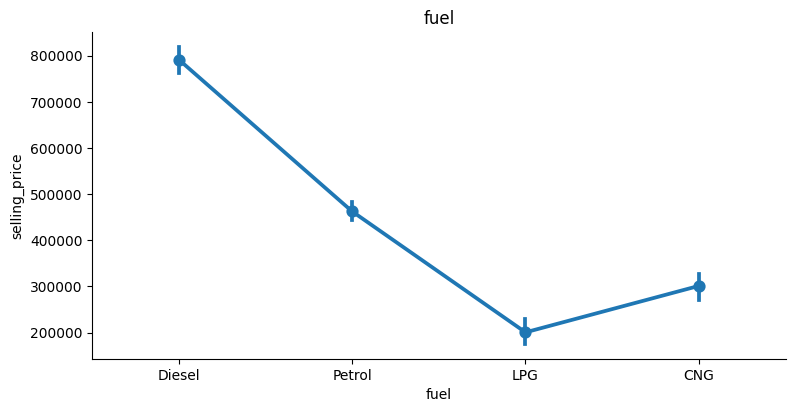

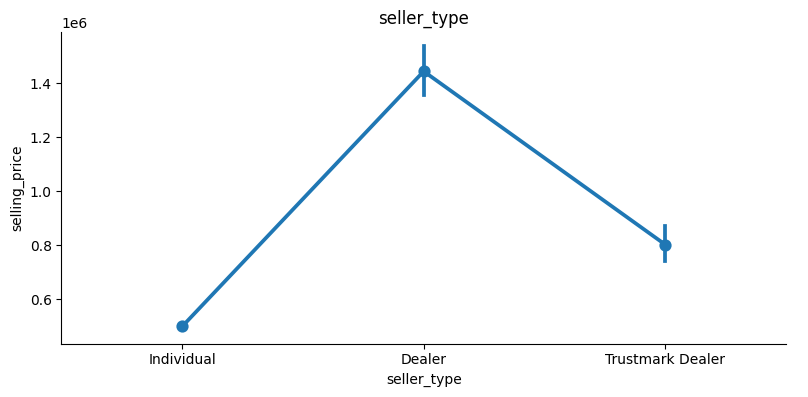

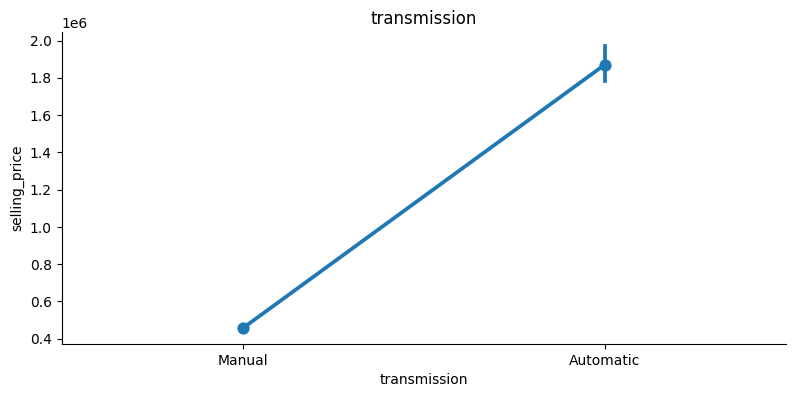

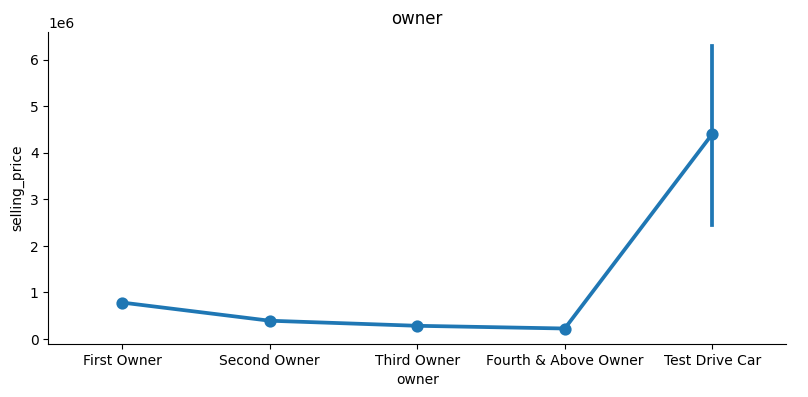

In [18]:
# Categorical Plots
for col in ["fuel", "seller_type", "transmission", "owner"]:
    sns.catplot(
        data=carData,
        x=col,
        y="selling_price",
        height=4,
        aspect=2,
        kind="point"
    )
    plt.title(col)


We have enough glimpse of the data now we will do the cleaning of data

# 2. Data Cleaning

In [19]:
carData.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

Clean Continuous Variables

In [21]:
# Fill Missing Values

# we need to fix the missing values for that we will use imputer that takes the median of
# data of that column and fixes the missing columns

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

imputer.fit(carCont)
X = imputer.transform(carCont)
car = pd.DataFrame(X, columns=carCont.columns)

imputer.statistics_

array([2.015e+03, 4.500e+05, 6.000e+04, 5.000e+00])

Clean Categorical Variables
* Clean the features
* Fill in missing values
* Create new features
* Create a new dataframe
* Converting dtype

In [22]:
# Cleaning Mileage Feature
carCat['mileage'] = carCat['mileage'].str.replace(" kmpl", "").str.replace(" km/kg", "")

In [23]:
# Cleaning engine feature
carCat['engine'] = carCat['engine'].str.replace("CC", "")

In [24]:
carCat.loc[4933, "max_power"] = np.nan
carCat["max_power"] = carCat["max_power"].str.replace(" bhp", "")

In [25]:
# Dropping the Torque Feature because we will not use it in calculations

# carCat = carCat.drop(columns=["torque"])
carCat.head()

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)"
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)"


In [26]:
# Fill Missing
col = ["mileage", "engine", "max_power"]
X = carCat[col]

imputer = SimpleImputer()
imputer.fit(X)
car = pd.concat([car, pd.DataFrame(imputer.transform(X), columns=X.columns)], axis=1)


In [27]:
car.isnull().sum()

year             0
selling_price    0
km_driven        0
seats            0
mileage          0
engine           0
max_power        0
dtype: int64

In [28]:
# Create a brand feature by parsing name
names = ["Land Rover", "Swift Dzire", "Wagon R", "Vitara Brezza", "Alto 800", "Alto K10", "Zen Estilo", "KUV 100", "TUV 300", "Renault Logan", "Ssangyong Rexton", "Innova Crysta", "Etios Liva", "Corolla Altis", "B Class", "New C-Class", "3 Series", "5 Series", "7 Series", "X4 M", "Indica Vista", "New Safari", "Santro Xing", "Grand i10", "Elite i20", "Figo Aspire", "Fiesta Classic", "Grande Punto", "Tavera Neo", "Sail Hatchback", "GO Plus"]

for i in carCat["name"]:
    for j in names:
        if j in i:
            carCat["name"] = carCat["name"].str.replace(j, j.replace(" ", "-"))

carCat.insert(0, "brand", carCat["name"].apply(lambda x : x.split(" ")[0]))

In [29]:
carCat.insert(1, "model", carCat["name"].apply(lambda x : x.split(" ")[1]))

# Create a variant feature by parsing name
carCat.insert(2, "variant", carCat["name"].apply(lambda x: x.split(" ")[2:]).apply(lambda x: " ".join(x)))

In [30]:
carCat.head()

,brand,model,variant,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti,Swift-Dzire,VDI,Maruti Swift-Dzire VDI,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm
1,Skoda,Rapid,1.5 TDI Ambition,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm
2,Honda,City,2017-2020 EXi,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)"
3,Hyundai,i20,Sportz Diesel,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm
4,Maruti,Swift,VXI BSIII,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)"


New Dataframe

In [31]:
# Combine continuous variables & categorical variables into new dataframe
carClean = pd.concat([carCat.iloc[:, :3], carCat.iloc[:, 3:8], car], axis=1)
carClean.head()

,brand,model,variant,name,fuel,seller_type,transmission,owner,year,selling_price,km_driven,seats,mileage,engine,max_power
0,Maruti,Swift-Dzire,VDI,Maruti Swift-Dzire VDI,Diesel,Individual,Manual,First Owner,2014.0,450000.0,145500.0,5.0,23.40,1248.0,74.00
1,Skoda,Rapid,1.5 TDI Ambition,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,2014.0,370000.0,120000.0,5.0,21.14,1498.0,103.52
2,Honda,City,2017-2020 EXi,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,2006.0,158000.0,140000.0,5.0,17.70,1497.0,78.00
3,Hyundai,i20,Sportz Diesel,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,2010.0,225000.0,127000.0,5.0,23.00,1396.0,90.00
4,Maruti,Swift,VXI BSIII,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,2007.0,130000.0,120000.0,5.0,16.10,1298.0,88.20


In [32]:
# Converting Datatype
int_list = ["year", "selling_price", "km_driven", "seats", "engine"]

for i in int_list:
    carClean[i] = carClean[i].astype("int64")

In [33]:
carClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8128 non-null   object 
 1   model          8128 non-null   object 
 2   variant        8128 non-null   object 
 3   name           8128 non-null   object 
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   year           8128 non-null   int64  
 9   selling_price  8128 non-null   int64  
 10  km_driven      8128 non-null   int64  
 11  seats          8128 non-null   int64  
 12  mileage        8128 non-null   float64
 13  engine         8128 non-null   int64  
 14  max_power      8128 non-null   float64
dtypes: float64(2), int64(5), object(8)
memory usage: 952.6+ KB


# 3. Data Analytics

Now lets see which brand is selling max cars !

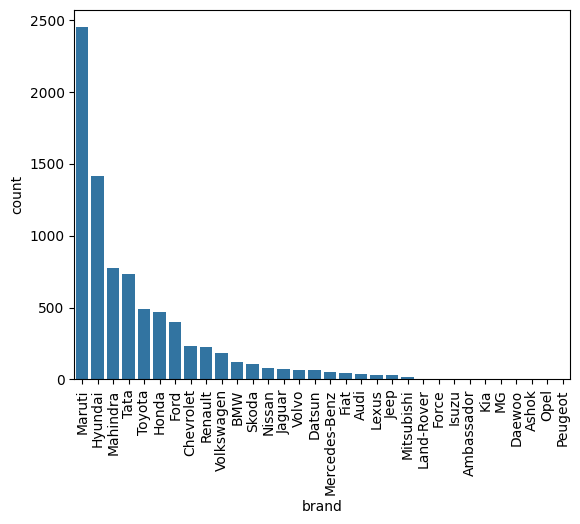

In [34]:
sns.countplot(
    data = carClean,
    x = "brand",
    order = carClean['brand'].value_counts().index
)
plt.xticks(rotation=90);

<mark>Maruti sells the most number of cars</mark>

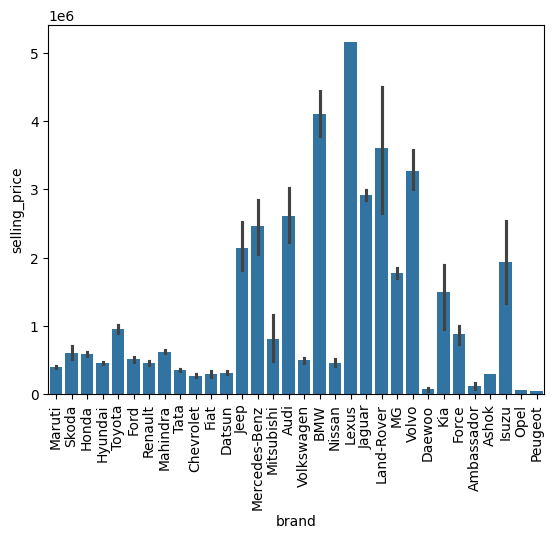

In [35]:
# Which brand sells the most expensive cars?
sns.barplot(
    data = carClean,
    x = "brand",
    y = "selling_price"
)
plt.xticks(rotation=90);

<mark>Lexus sells the most expensive car</mark>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Mahindra'),
  Text(3, 0, 'Tata'),
  Text(4, 0, 'Toyota'),
  Text(5, 0, 'Honda'),
  Text(6, 0, 'Ford'),
  Text(7, 0, 'Chevrolet'),
  Text(8, 0, 'Renault'),
  Text(9, 0, 'Volkswagen'),
  Text(10, 0, 'BMW'),
  Text(11, 0, 'Skoda'),
  Text(12, 0, 'Nissan'),
  Text(13, 0, 'Jaguar'),
  Text(14, 0, 'Volvo'),
  Text(15, 0, 'Datsun'),
  Text(16, 0, 'Mercedes-Benz'),
  Text(17, 0, 'Fiat'),
  Text(18, 0, 'Audi'),
  Text(19, 0, 'Lexus'),
  Text(20, 0, 'Jeep'),
  Text(21, 0, 'Mitsubishi'),
  Text(22, 0, 'Land-Rover'),
  Text(23, 0, 'Force'),
  Text(24, 0, 'Isuzu'),
  Text(25, 0, 'Ambassador'),
  Text(26, 0, 'Kia'),
  Text(27, 0, 'MG'),
  Text(28, 0, 'Daewoo'),
  Text(29, 0, 'Ashok'),
  Text(30, 0, 'Opel'),
  Text(31, 0, 'Peugeot')])

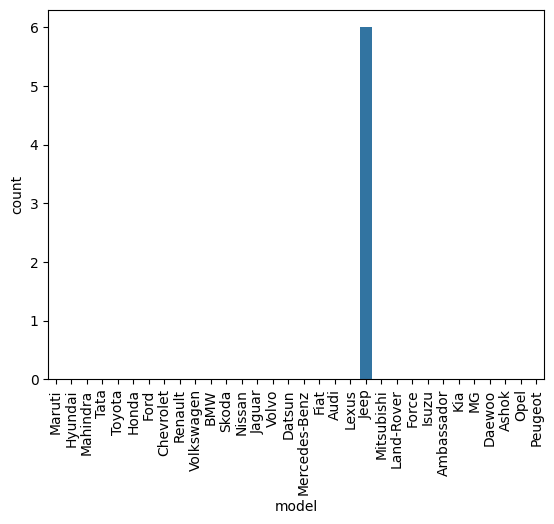

In [40]:
# What model of car has sold the most?

sns.countplot(
    data = carClean,
    x = "model",
    order = carClean['brand'].value_counts().index
)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Swift'),
  Text(1, 0, 'Swift-Dzire'),
  Text(2, 0, 'i20'),
  Text(3, 0, 'Wagon-R'),
  Text(4, 0, 'Bolero'),
  Text(5, 0, 'Verna'),
  Text(6, 0, 'Grand-i10'),
  Text(7, 0, 'Innova'),
  Text(8, 0, 'City'),
  Text(9, 0, 'Scorpio'),
  Text(10, 0, 'Alto'),
  Text(11, 0, 'Ertiga'),
  Text(12, 0, 'Alto-800'),
  Text(13, 0, 'XUV500'),
  Text(14, 0, 'i10'),
  Text(15, 0, 'Indigo'),
  Text(16, 0, 'EON'),
  Text(17, 0, 'Figo'),
  Text(18, 0, 'Baleno'),
  Text(19, 0, 'Alto-K10'),
  Text(20, 0, 'KWID'),
  Text(21, 0, 'Amaze'),
  Text(22, 0, '800'),
  Text(23, 0, 'Santro-Xing'),
  Text(24, 0, 'Creta')])

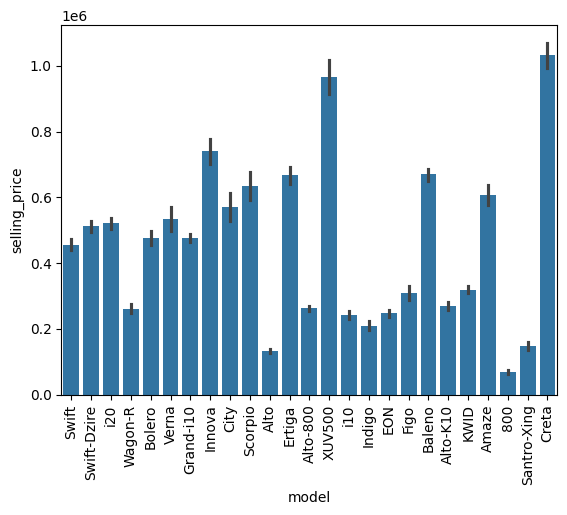

In [41]:
# Which car model is the most expensive among top 25 most selling cars?
sns.barplot(
    data = carClean,
    x = 'model',
    y = "selling_price", 
    order=carClean['model'].value_counts()[:25].index
)
plt.xticks(rotation=90)

[Text(0.5, 0, '')]

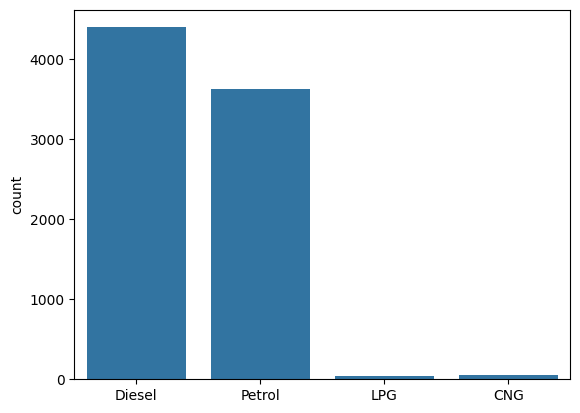

In [42]:
# Which fuel type is mostly preferred?
sns.countplot(
    data=carClean,
    x='fuel',
).set(xlabel = None)

<Axes: xlabel='fuel', ylabel='selling_price'>

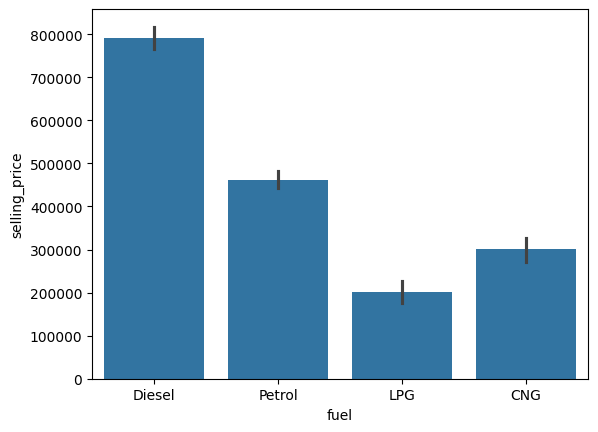

In [43]:
# How fuel is related with selling price?
sns.barplot(
    data=carClean,
    x='fuel',
    y='selling_price'
)

<mark>Diesel cars are expensive among other fuel cars.

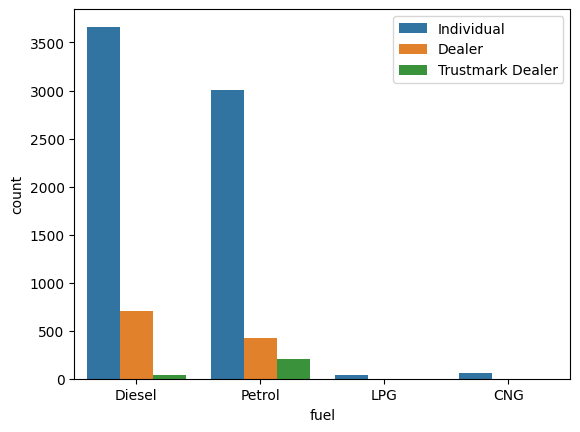

In [44]:
# How fuel is related with seller type?
sns.countplot(
    data=carClean,
    x='fuel',
    hue='seller_type'
)
plt.legend(loc='upper right');

<Axes: xlabel='fuel', ylabel='mileage'>

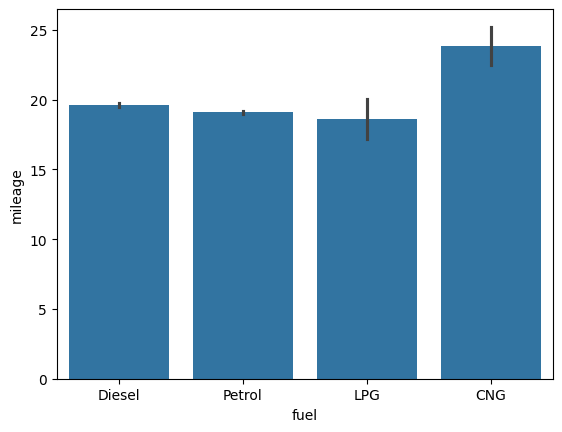

In [46]:
# How fuel is related with mileage?
sns.barplot(
    data=carClean,
    x='fuel',
    y='mileage'
)


<Axes: xlabel='seller_type', ylabel='count'>

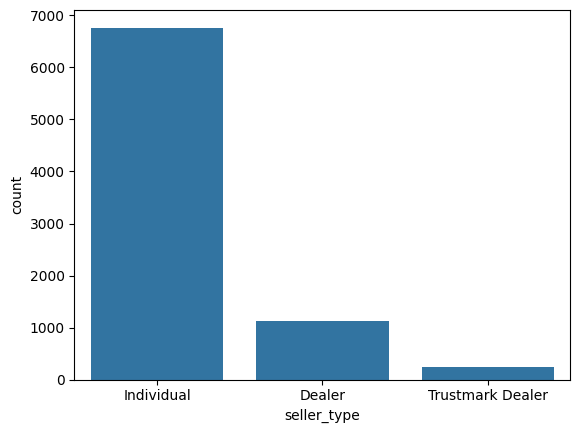

In [47]:
# Which seller type is mostly preferred?
sns.countplot(
    data=carClean,
    x='seller_type'
)

<Axes: xlabel='seller_type', ylabel='selling_price'>

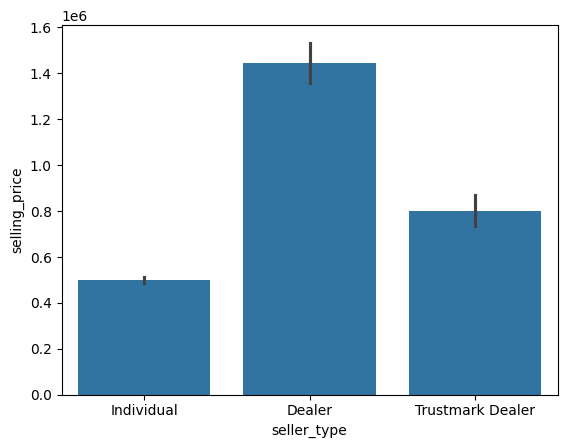

In [48]:
# How seller type is related with selling price?

sns.barplot(
    data=carClean,
    x='seller_type',
    y='selling_price'
)

<Axes: xlabel='transmission', ylabel='count'>

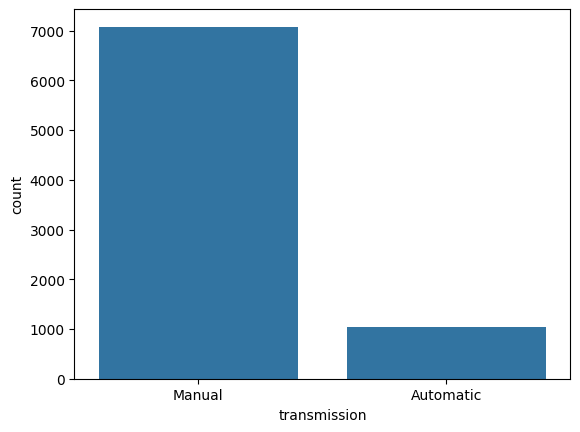

In [49]:
# Which transmission is mostly preferred?
sns.countplot(
    data=carClean,
    x='transmission'
)

<Axes: xlabel='transmission', ylabel='selling_price'>

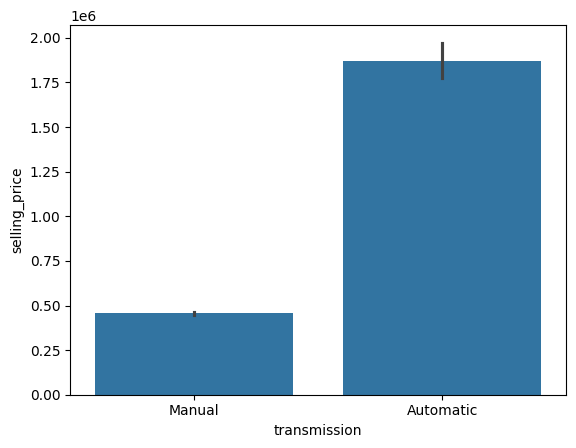

In [50]:
# How transmission is related with selling price?

sns.barplot(
    data=carClean,
    x = 'transmission',
    y = 'selling_price'
)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'First Owner'),
  Text(1, 0, 'Second Owner'),
  Text(2, 0, 'Third Owner'),
  Text(3, 0, 'Fourth & Above Owner'),
  Text(4, 0, 'Test Drive Car')])

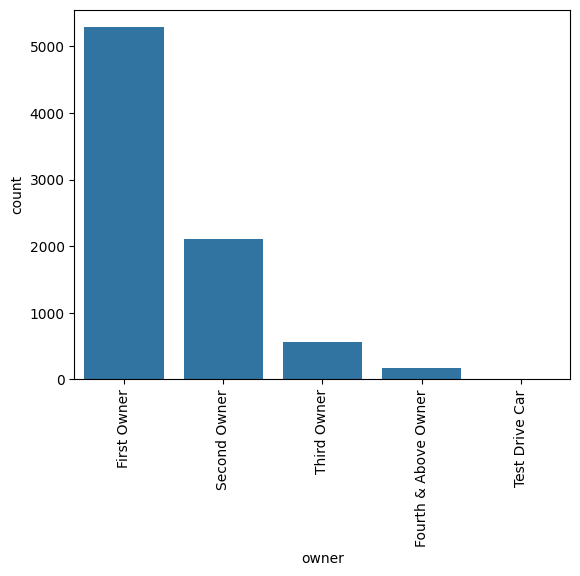

In [51]:
# What is the distribution of owners?
sns.countplot(
    data=carClean,
    x='owner'
)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, '1983'),
  Text(1, 0, '1991'),
  Text(2, 0, '1994'),
  Text(3, 0, '1995'),
  Text(4, 0, '1996'),
  Text(5, 0, '1997'),
  Text(6, 0, '1998'),
  Text(7, 0, '1999'),
  Text(8, 0, '2000'),
  Text(9, 0, '2001'),
  Text(10, 0, '2002'),
  Text(11, 0, '2003'),
  Text(12, 0, '2004'),
  Text(13, 0, '2005'),
  Text(14, 0, '2006'),
  Text(15, 0, '2007'),
  Text(16, 0, '2008'),
  Text(17, 0, '2009'),
  Text(18, 0, '2010'),
  Text(19, 0, '2011'),
  Text(20, 0, '2012'),
  Text(21, 0, '2013'),
  Text(22, 0, '2014'),
  Text(23, 0, '2015'),
  Text(24, 0, '2016'),
  Text(25, 0, '2017'),
  Text(26, 0, '2018'),
  Text(27, 0, '2019'),
  Text(28, 0, '2020')])

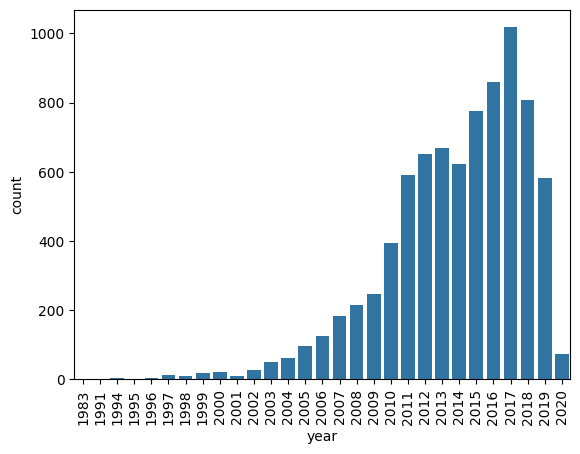

In [52]:
# In which year most cars sold?
sns.countplot(
    data=carClean,
    x='year'
)
plt.xticks(rotation=90)

<mark>Maximum cars were sold in year 2017.
We can also see a decline in sales from 2017 to 2020.
In 2020 cars are less because less number of data is available


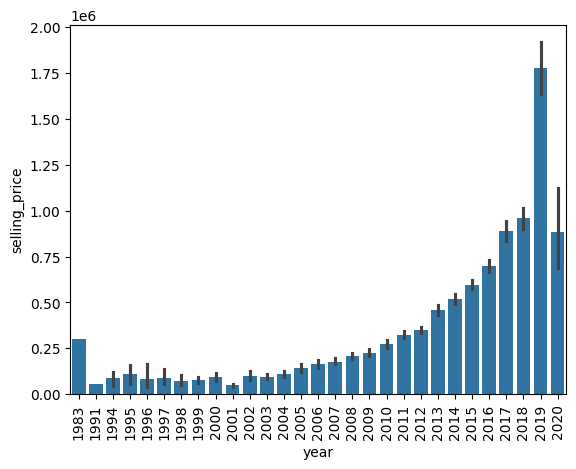

In [53]:
# How year is related with selling price?
sns.barplot(
    data=carClean,
    x='year',
    y='selling_price'
)
plt.xticks(rotation=90);

# 4. Data Preparation

Cap And Floor Data To Remove Outliers

In [54]:
carClean.describe()

,year,selling_price,km_driven,seats,mileage,engine,max_power
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.405389,19.418783,1458.608022,91.517919
std,4.044249,8.062534e+05,5.655055e+04,0.948874,3.981875,497.017515,35.343246
min,1983.000000,2.999900e+04,1.000000e+00,2.000000,0.000000,624.000000,0.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000,16.800000,1197.000000,68.100000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,19.418783,1248.000000,83.100000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000,22.277500,1582.000000,101.250000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,42.000000,3604.000000,400.000000


In [55]:
def detect_outliers(feature):
    outliers = []
    data = carClean[feature]
    mean = np.mean(data)
    std = np.std(data)

    for y in data:
        z_score = (y - mean) / std
        if np.abs(z_score) > 3:
            outliers.append(y)
        
    print(f"\nOutlier cap for {feature}\n")
    print(f"-95p: {data.quantile(.95)} / {len([i for i in data if i > data.quantile(0.95)])}")
    print(f"-3sd: {mean + 3 * (std)} / {len(outliers)}")
    print(f"-99p:  {data.quantile(.99)} / {len([i for i in data if i > data.quantile(0.99)])}")
        


In [56]:
features = ["km_driven", "mileage", "max_power"]
for feat in features:
    detect_outliers(feat)


Outlier cap for km_driven

-95p: 150000.0 / 392
-3sd: 239460.73913134314 / 72
-99p:  225000.0 / 80

Outlier cap for mileage

-95p: 25.83 / 377
-3sd: 31.36367367754694 / 24
-99p:  28.4 / 9

Outlier cap for max_power

-95p: 171.5 / 390
-3sd: 197.54113546717923 / 94
-99p:  204.0 / 80


In [57]:
car.describe()

,year,selling_price,km_driven,seats,mileage,engine,max_power
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.405389,19.418783,1458.625016,91.517919
std,4.044249,8.062534e+05,5.655055e+04,0.948874,3.981875,497.017504,35.343246
min,1983.000000,2.999900e+04,1.000000e+00,2.000000,0.000000,624.000000,0.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000,16.800000,1197.000000,68.100000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,19.418783,1248.000000,83.100000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000,22.277500,1582.000000,101.250000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,42.000000,3604.000000,400.000000


In [58]:
# Cap features
carClean['km_driven'].clip(upper=car['km_driven'].quantile(.99), inplace=True)
carClean['mileage'].clip(upper=car['mileage'].quantile(.99), inplace=True)
carClean['max_power'].clip(upper=car['max_power'].quantile(.99), inplace=True)


C:\Users\ragha\AppData\Local\Temp\ipykernel_5316\3264410340.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  carClean['km_driven'].clip(upper=car['km_driven'].quantile(.99), inplace=True)
C:\Users\ragha\AppData\Local\Temp\ipykernel_5316\3264410340.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [59]:
carClean.describe()

,year,selling_price,km_driven,seats,mileage,engine,max_power
count,8128.000000,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,68781.682210,5.405389,19.413195,1458.608022,91.172396
std,4.044249,8.062534e+05,45035.523974,0.948874,3.964241,497.017515,33.918028
min,1983.000000,2.999900e+04,1.000000,2.000000,0.000000,624.000000,0.000000
25%,2011.000000,2.549990e+05,35000.000000,5.000000,16.800000,1197.000000,68.100000
50%,2015.000000,4.500000e+05,60000.000000,5.000000,19.418783,1248.000000,83.100000
75%,2017.000000,6.750000e+05,98000.000000,5.000000,22.277500,1582.000000,101.250000
max,2020.000000,1.000000e+07,225000.000000,14.000000,28.400000,3604.000000,204.000000


C:\Users\ragha\AppData\Local\Temp\ipykernel_5316\4286532727.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\ragha\AppData\Roaming\Python\Python311\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\ragha\AppData\Local\Temp\ipykernel_5316\4286532727.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-lev

<Axes: xlabel='km_driven', ylabel='Density'>

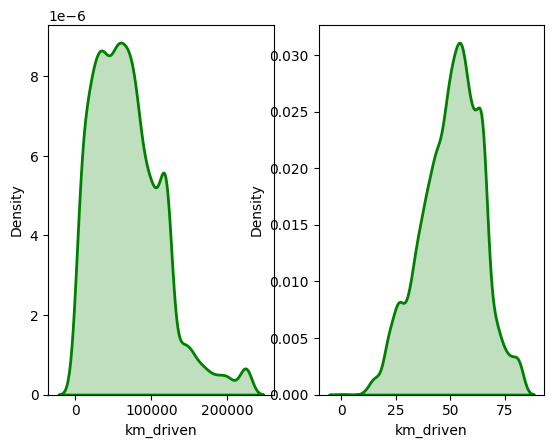

In [60]:
# A Box cox transformation is defined as a way to transform non-normal dependent variables in our data to a normal shape through which we can run a lot more tests than we could have

# We need this transformation for our non normal data to look like bell shaped curve for this we do Transformation
from scipy import stats

fig, ax = plt.subplots(1, 2)
sns.distplot(
    carClean['km_driven'], hist = False, kde = True,
    kde_kws = {'shade': True, 'linewidth': 2},
    label = "Non-Normal", color ="green", ax = ax[0]
)

# fitted_data, fitted_lambda = stats.boxcox(carClean['km_driven'])
carClean['km_driven'] = carClean['km_driven'].apply(lambda x: x ** (1/2.8))

sns.distplot(
    carClean['km_driven'], hist = False, kde = True,
    kde_kws = {'shade': True, 'linewidth': 2},
    label = "Normal", color ="green", ax = ax[1]
)


In [61]:
carClean['km_driven'].head()

0    69.803892
1    65.161834
2    68.849830
3    66.494702
4    65.161834
Name: km_driven, dtype: float64

In [62]:
carClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8128 non-null   object 
 1   model          8128 non-null   object 
 2   variant        8128 non-null   object 
 3   name           8128 non-null   object 
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   year           8128 non-null   int64  
 9   selling_price  8128 non-null   int64  
 10  km_driven      8128 non-null   float64
 11  seats          8128 non-null   int64  
 12  mileage        8128 non-null   float64
 13  engine         8128 non-null   int64  
 14  max_power      8128 non-null   float64
dtypes: float64(3), int64(4), object(8)
memory usage: 952.6+ KB


In [69]:
# Convert categorical features to numeric levels

# Target encoding categorical variables solves the dimensionality problem we get by using One-Hot Encoding, but this approach needs to be used with caution to avoid Target Leaking.

# Target encoding is a simple and quick encoding method that doesn’t add to the dimensionality of the dataset. Therefore it may be used as a good first try encoding method.

# Target encoding is dependent on the distribution of the target which means target encoding requires careful validation as it can be prone to overfitting.

# One-hot encoding works well with nominal data and eliminates any issue of higher categorical values influencing data, since we are creating each column in the binary 1 or 0.

# One-hot encoding can create very high dimensionality depending on the number of categorical features you have and the number of categories per feature. This can become problematic not only in smaller datasets but also potentially in larger datasets as well.

# Thats why we use target encoder above one hot encoder

import category_encoders as ce
colsToEncode = ['brand', 'model', 'variant', 'name', 'fuel', 'seller_type', 'transmission', 'owner']
target_encoder = ce.TargetEncoder(cols=colsToEncode)
carClean[colsToEncode] = target_encoder.fit_transform(carClean[colsToEncode], carClean['selling_price'])
carClean.head()


,brand,model,variant,name,fuel,seller_type,transmission,owner,year,selling_price,km_driven,seats,mileage,engine,max_power
0,403075.721405,512518.470899,536322.133923,578659.960795,791452.921627,498561.232043,455425.86451,783086.414445,2014,450000,69.803892,5,23.40,1248,74.00
1,607729.985723,596795.683911,623092.226875,623092.226875,791452.921627,498561.232043,455425.86451,392964.468409,2014,370000,65.161834,5,21.14,1498,103.52
2,596178.014989,570062.265467,536944.137982,536944.137982,462441.061691,498561.232043,455425.86451,284015.331532,2006,158000,68.849830,5,17.70,1497,78.00
3,458554.366784,520630.469208,584501.643304,584501.643304,791452.921627,498561.232043,455425.86451,783086.414445,2010,225000,66.494702,5,23.00,1396,90.00
4,403075.721405,456304.403465,528568.112831,569009.931818,462441.061691,498561.232043,455425.86451,783086.414445,2007,130000,65.161834,5,16.10,1298,88.20


# 5. Training Model

In [70]:
# Drop unnecccessary features and split into training/test sets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = carClean.drop(['selling_price'], axis=1)
y = carClean['selling_price']
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [71]:
# There are several ways to improve model validity by adjusting different aspects of the data. There are two different types of features where these sorts of alterations are often beneficial, and these are categorical features and continuous features. For categorical features, we use encoders. For continuous features, we use scalers.

# These scalers are used on data in order to make it more interpretable by machine-learning algorithms. This type of math can help us to make generalizations and draw conclusions from data a lot more decisively.

scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [72]:
X_train.head()

,brand,model,variant,name,fuel,seller_type,transmission,owner,year,km_driven,seats,mileage,engine,max_power
0,403075.721405,512518.470899,536322.133923,578659.960795,791452.921627,498561.232043,455425.86451,783086.414445,2014,69.803892,5,23.40,1248,74.00
1,607729.985723,596795.683911,623092.226875,623092.226875,791452.921627,498561.232043,455425.86451,392964.468409,2014,65.161834,5,21.14,1498,103.52
2,596178.014989,570062.265467,536944.137982,536944.137982,462441.061691,498561.232043,455425.86451,284015.331532,2006,68.849830,5,17.70,1497,78.00
3,458554.366784,520630.469208,584501.643304,584501.643304,791452.921627,498561.232043,455425.86451,783086.414445,2010,66.494702,5,23.00,1396,90.00
4,403075.721405,456304.403465,528568.112831,569009.931818,462441.061691,498561.232043,455425.86451,783086.414445,2007,65.161834,5,16.10,1298,88.20


In [73]:
features = X_train.columns
X_train[features] = scaler.transform(X_train)
X_val[features] = scaler.transform(X_val)
X_test[features] = scaler.transform(X_test)

C:\Users\ragha\AppData\Local\Temp\ipykernel_5316\4117437113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[features] = scaler.transform(X_train)


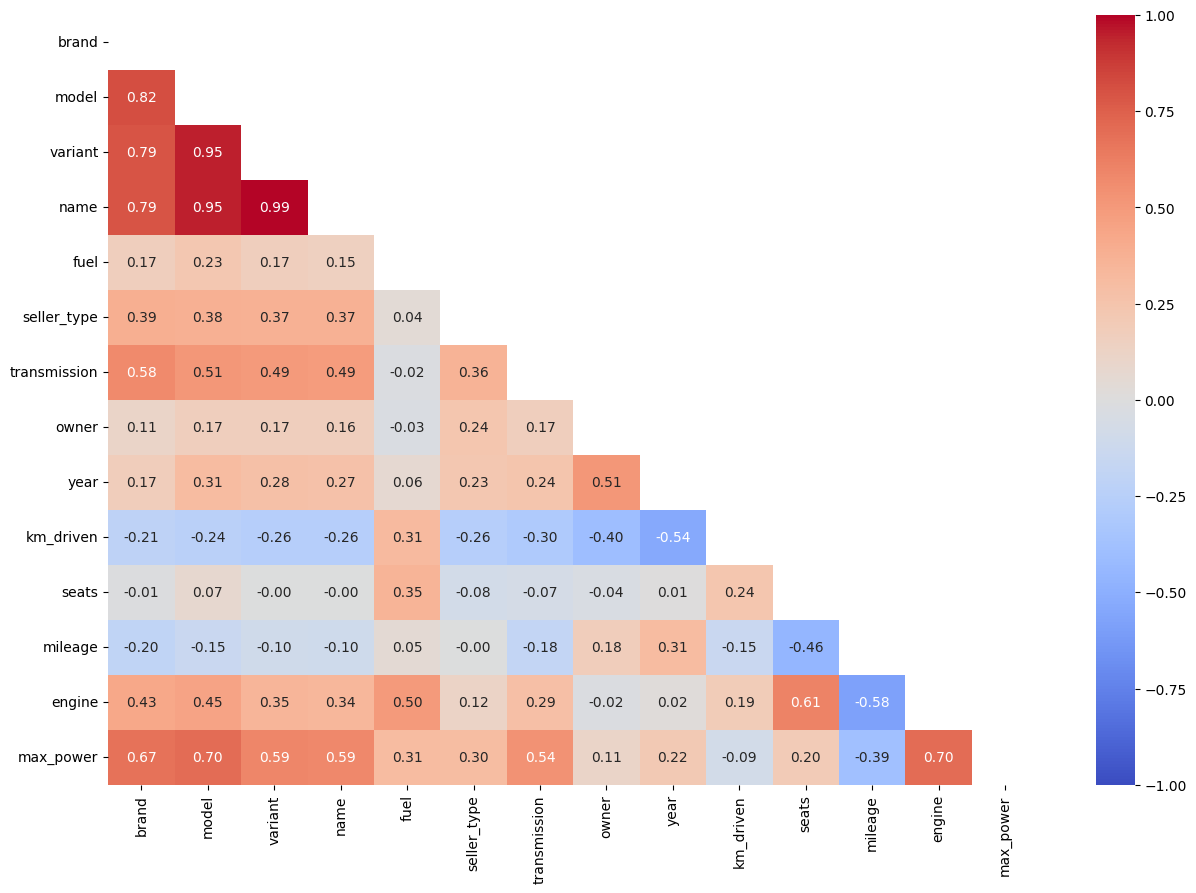

In [74]:
# triu returns matrix below diagonal of a corr matrix
matrix = np.triu(X_train[features].corr())

plt.figure(figsize=(15, 10))

sns.heatmap(
    X_train[features].corr(),
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    mask=matrix
);


In [75]:
# From the heatmap we can clearly understand that variant, model and max_power are highly correlated to each other which may cause problem to our model later on due their collinearity (Multicollinearity). So we will remove them

X = carClean.drop(['selling_price', 'model', 'variant', 'max_power'], axis=1)
y = carClean['selling_price']
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [76]:
scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [77]:
# Scale the training, test and validation sets
features = X_train.columns
X_train[features] = scaler.transform(X_train)
X_val[features] = scaler.transform(X_val)
X_test[features] = scaler.transform(X_test)

C:\Users\ragha\AppData\Local\Temp\ipykernel_5316\177256264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[features] = scaler.transform(X_train)


In [78]:
X_train

,brand,name,fuel,seller_type,transmission,owner,year,km_driven,seats,mileage,engine
0,-0.349592,-0.156419,0.921923,-0.428922,-0.38619,0.715162,0.052178,1.446107,-0.430388,1.016160,-0.422699
1,-0.035817,-0.077254,0.921923,-0.428922,-0.38619,-1.194857,0.052178,1.099615,-0.430388,0.443644,0.077798
2,-0.053529,-0.230745,-1.042827,-0.428922,-0.38619,-1.728267,-1.926314,1.374894,-0.430388,-0.427796,0.075796
3,-0.264533,-0.146011,0.921923,-0.428922,-0.38619,0.715162,-0.937068,1.199103,-0.430388,0.914830,-0.126405
4,-0.349592,-0.173613,-1.042827,-0.428922,-0.38619,0.715162,-1.679002,1.099615,-0.430388,-0.833118,-0.322600
...,...,...,...,...,...,...,...,...,...,...,...
6498,-0.012062,-0.128013,0.921923,-0.428922,-0.38619,-1.194857,-0.442445,1.099615,3.778350,-1.859087,1.441151
6499,-0.264533,-0.083362,0.921923,-0.428922,-0.38619,0.715162,1.041423,-0.631883,-0.430388,1.522811,-0.546822
6500,-0.053529,-0.035899,0.921923,-0.428922,-0.38619,0.715162,1.041423,-0.392924,-0.430388,2.029463,0.077798
6501,-0.349592,-0.914134,-1.042827,-0.428922,-0.38619,0.715162,-1.679002,0.033027,-0.430388,0.078855,-1.327598


Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from time import time

import warnings
warnings.filterwarnings("ignore")

In [82]:
# Understanding Params -> 
# intercept is the value of y when x = 0 in the equation of linear regression
# positive indicates that as the value of the independent variable increases the mean of the dependent variable also tends to increase

# ravel is used to return the contiguous array

# We will prepare models by Grid Search and finding the best hyperparameter that suits our model so thats why we will use best_estimator and will store that

params = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

lr_cv = GridSearchCV(LinearRegression(), params, cv=5)
lr_cv.fit(X_train[features], y_train.values.ravel())

lr = lr_cv.best_estimator_
lr.fit(X_train[features], y_train.values.ravel())


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Least Absolute and Selection Operator (LASSO)

In [83]:
# Lasso Regression provides us the benefit of Feature selection

parameters = {
    "alpha": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "fit_intercept": [True, False],
    "precompute": [True, False],
    "warm_start": [True, False],
    "positive": [True, False],
    "selection": ["cyclic", "random"]
}

ls_cv = GridSearchCV(Lasso(), parameters, cv=5)
ls_cv.fit(X_train[features], y_train.values.ravel())

ls = ls_cv.best_estimator_
ls.fit(X_train[features], y_train.values.ravel())

,alpha,0.9
,fit_intercept,True
,precompute,True
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'random'


Ridge

In [84]:
# Ridge Deals with the multicolliearity
parameters = {
    "alpha": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "fit_intercept": [True, False],
    "solver": ["svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"],
    "positive": [True, False]
}

rg_cv = GridSearchCV(Ridge(), parameters, cv=5)
rg_cv.fit(X_train[features], y_train.values.ravel())

rg = rg_cv.best_estimator_
rg.fit(X_train[features], y_train.values.ravel())

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'saga'
,positive,False
,random_state,None


Elastic Net

In [85]:
# Elastic Net is the Hybrid of both Regressions
parameters = {
    "alpha": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "fit_intercept": [True, False],
    "precompute": [True, False],
    "warm_start": [True, False],
    "positive": [True, False],
    "selection": ["cyclic", "random"]
}

el_cv = GridSearchCV(ElasticNet(), parameters, cv=5)
el_cv.fit(X_train[features], y_train.values.ravel())

el = el_cv.best_estimator_
el.fit(X_train[features], y_train.values.ravel())

,alpha,0.1
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'random'


Decision Tree

In [86]:
parameters = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error"],
    "splitter": ["best", "random"],
    "max_depth": [2, 4, 8, 16, 32],
    "min_samples_split": [2, 4, 8, 16, 32],
    "min_samples_leaf": [2, 4, 8, 16, 32]
}

dt_cv = GridSearchCV(DecisionTreeRegressor(), parameters, cv=5)
dt_cv.fit(X_train[features], y_train.values.ravel())

dt = dt_cv.best_estimator_
dt.fit(X_train[features], y_train.values.ravel())

,criterion,'absolute_error'
,splitter,'best'
,max_depth,16
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


Random Forest

In [ ]:
parameters = {
    "n_estimators": [5, 50, 250, 500],
    "max_depth": [2, 4, 8, 16, 32]
}

rf_cv = GridSearchCV(RandomForestRegressor(), parameters, cv=5)
rf_cv.fit(X_train[features], y_train.values.ravel())

rf = rf_cv.best_estimator_
rf.fit(X_train[features], y_train.values.ravel())

Adaptive Boosting

In [ ]:
# One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfitted. This results in new predic‐ tors focusing more and more on the hard cases. This is the technique used by Ada‐Boost.
parameters = {
    "n_estimators": [5, 50, 250, 500],
    "learning_rate": [0.01, 0.1, 1.0, 10, 100],
    "loss": ["linear", "square", "exponential"]
}

ada_cv = GridSearchCV(AdaBoostRegressor(), parameters, cv=5)
ada_cv.fit(X_train[features], y_train.values.ravel())

ada = ada_cv.best_estimator_
ada.fit(X_train[features], y_train.values.ravel())

Gradient Boosting

In [ ]:
# this method tries to fit the new predictor to the residual errors made by the previous predictor.
parameters = {
    "learning_rate": [0.01, 0.1, 1.0, 10, 100],
    "n_estimators": [5, 50, 250, 500],
    "max_depth": [2, 4 ,8, 16, 32]
}

gb_cv = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)
gb_cv.fit(X_train[features], y_train.values.ravel())

gb = gb_cv.best_estimator_
gb.fit(X_train[features], y_train.values.ravel())

Extreme Gradient Boosting

In [133]:
parameters = {
    "n_estimators": [5, 50, 250, 500],
    "max_depth": [2, 4, 8, 16, 32],
    "learning_rate": [0.01, 0.1, 1.0, 10, 100],
    "eval_metric": ["rmse", "mae", "logloss"],
    "early_stopping_rounds": [5, 10]
}

xgb_cv = GridSearchCV(XGBRegressor(), parameters, cv=5)
xgb_cv.fit(X_train[features], y_train.values.ravel(), eval_set=[(X_val[features], y_val)], verbose=0)

xgb = xgb_cv.best_estimator_
xgb.fit(X_train[features], y_train.values.ravel(), eval_set=[(X_val[features], y_val)], verbose=0)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Light Gradient Boosting Machine

In [ ]:
parameters = {
    "boosting_type": ["gbdt", "dart", "goss", "rf"],
    "max_depth": [2, 4, 8, 16, 32],
    "learning_rate": [0.01, 0.1, 1.0, 10, 100],
    "n_estimators": [5, 50, 250, 500]
}

lgbm_cv = GridSearchCV(LGBMRegressor(), parameters, cv=5)
lgbm_cv.fit(X_train[features], y_train.values.ravel())

lgbm = lgbm_cv.best_estimator_
lgbm.fit(X_train[features], y_train.values.ravel())

K-Nearest Neighbor

In [ ]:
parameters = {
    "n_neighbors": range(2, 21),
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "metric": ["minkowski", "euclidean", "manhattan"]
}

knn_cv = GridSearchCV(KNeighborsRegressor(), parameters, cv=5)
knn_cv.fit(X_train[features], y_train.values.ravel())

knn = knn_cv.best_estimator_
knn.fit(X_train[features], y_train.values.ravel())

Support Vector Regression

In [ ]:
parameters = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]
}

svr_cv = GridSearchCV(SVR(), parameters, cv=5)
svr_cv.fit(X_train[features], y_train.values.ravel())

svr = svr_cv.best_estimator_
svr.fit(X_train[features], y_train.values.ravel())

Stacking

In [ ]:
estimators = [("lr", lr), ("ls", ls), ("rg", rg), ("el", el), ("dt", dt), ("rf", rf), ("ada", ada), ("gb", gb), ("lgbm", lgbm), ("knn", knn), ("svr", svr)]
parameters = {
    "passthrough": [True, False]
}

sr_cv = GridSearchCV(StackingRegressor(estimators=estimators, final_estimator=lr), parameters, cv=5)
sr_cv.fit(X_train[features], y_train.values.ravel())

sr = sr_cv.best_estimator_
sr.fit(X_train[features], y_train.values.ravel())

Evaluate Models On The Validation Set

In [ ]:
# Evaluate all of our models on the validation set
models = [lr, ls, rg, el, dt, rf, ada, gb, xgb, lgbm, knn, svr, sr]
val_set = pd.DataFrame()

for mdl in models:
        start = time()
        pred = mdl.predict(X_val[features])
        end = time()
        temp = pd.DataFrame(
                {
                    "R2 Score": ("%0.3f" % (r2_score(y_val, pred))),
                    "Adjusted R2": ("%0.3f" % (1 - (1 - r2_score(y_val, pred)) * (X_train[features].shape[0] - 1) / (X_train[features].shape[0] - X_train[features].shape[1] - 1))),
                    "Mean Absolute Error": ("%0.3f" % (mean_absolute_error(y_val, pred))),
                    "Mean Squared Error": ("%0.3f" % (mean_squared_error(y_val, pred))),
                    "Root Mean Square Error": ("%0.3f" % (np.sqrt(mean_squared_error(y_val, pred)))),
                    "Latency": ("%0.1fms" % ((end-start) * 1000))
                },
            index=[(str(mdl).split("Regressor")[0].split("(")[0])]
        )
        val_set = pd.concat([val_set, temp])
val_set

Evaluate Best Model On Test Set

In [ ]:
# Evaluate our final model on the test set
test_set = pd.DataFrame()

for mdl in models:
        start = time()
        pred = mdl.predict(X_test[features])
        end = time()
        temp = pd.DataFrame(
                {
                    "R2 Score": ("%0.3f" % (r2_score(y_test, pred))),
                    "Adjusted R2": ("%0.3f" % (1 - (1 - r2_score(y_test, pred)) * (X_train[features].shape[0] - 1) / (X_train[features].shape[0] - X_train[features].shape[1] - 1))),
                    "Mean Absolute Error": ("%0.3f" % (mean_absolute_error(y_test, pred))),
                    "Mean Squared Error": ("%0.3f" % (mean_squared_error(y_test, pred))),
                    "Root Mean Square Error": ("%0.3f" % (np.sqrt(mean_squared_error(y_test, pred)))),
                    "Latency": ("%0.1fms" % ((end-start) * 1000))
                },
            index=[(str(mdl).split("Regressor")[0].split("(")[0])]
        )
        test_set = pd.concat([test_set, temp])
test_set

In [ ]:
X_test

In [ ]:
X_train.columns

Training Model on Full Data

In [134]:
scaler = StandardScaler()
scaler.fit(X)

# Scale the training, test and validation sets
features = X.columns
X[features] = scaler.transform(X)


In [135]:
parameters = {
    "n_estimators": [5, 50, 250, 500],
    "max_depth": [2, 4, 8, 16, 32],
    "learning_rate": [0.01, 0.1, 1.0, 10, 100],
    "eval_metric": ["rmse", "mae", "logloss"],
    "early_stopping_rounds": [5, 10]
}

xgb_cv = GridSearchCV(XGBRegressor(), parameters, cv=5)
xgb_cv.fit(X[features], y.values.ravel(), eval_set=[(X_val[features], y_val)], verbose=0)

xgb = xgb_cv.best_estimator_
xgb.fit(X[features], y.values.ravel(), eval_set=[(X_val[features], y_val)], verbose=0)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [136]:
import pickle
pickle.dump(target_encoder, open('encoder.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(xgb, open('model.pkl', 'wb'))

In [137]:
transFeatures =['brand', 'model', 'variant', 'name', 'fuel', 'seller_type', 'transmission', 'owner']
int_list = ["year", "km_driven", "seats", "engine"]
float_list = ['mileage']
def transform(df):
    try:
        df[transFeatures] = target_encoder.transform(df[transFeatures])
    except Exception as e:
        print(e)

    for i in int_list:
        df[i] = df[i].astype("int64")

    for j in float_list:
        df[j] = df[j].astype("float")


def make_prediction(df):
    X = df.drop(['model', 'variant'], axis=1)
    X = scaler.transform(X)
    
    pred = xgb.predict(X)
    return pred

df = pd.DataFrame([['Hyundai', 'i20', 'Sportz', 'Hyundai i20 Sportz', 'Diesel', 'Individual', 'Manual', 'First Owner', '2019', '25000', '5', '20', '1248']], columns=['brand', 'model', 'variant', 'name', 'fuel', 'seller_type', 'transmission', 'owner', 'year', 'km_driven', 'seats', 'mileage', 'engine'])

transform(df)
pred = make_prediction(df)

print(pred)
# xgb.predict(X_user)
# target_encoder

[679934.3]
